In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
mp.rcParams["figure.figsize"]=(20,10)

In [2]:
df1=pd.read_csv("houseData.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df2=df1.drop(['area_type','availability','society','balcony'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [4]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [5]:
df2.shape

(13320, 5)

In [6]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [7]:
df3.shape

(13246, 5)

In [8]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
df3['bhk']=df3['size'].apply(lambda x:int(x.split(' ')[0]))
df4=df3.drop('size',axis='columns')
df4.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\3595912947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x:int(x.split(' ')[0]))


,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [10]:
df4.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [11]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
df4[~df4['total_sqft'].apply(is_float)]

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,122.000,3
13059,Harlur,1200 - 1470,2.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,59.135,2


In [12]:
def range_to_avg(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
range_to_avg('2100-2850')

2475.0

In [13]:
df5=df4.copy()
df5['total_sqft']=df4['total_sqft'].apply(range_to_avg)
df5.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [14]:
df6=df5.copy()
df6['price_per_sqft']=df6['price']*100000/df6['total_sqft']
df6.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [15]:
len(df6.location.unique())

1304

In [16]:
df6.location=df6.location.apply(lambda x:x.strip())
location_stats=df6.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [17]:
len(location_stats[location_stats<=10])

1052

In [18]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [19]:
df6.location=df6.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)
len(df6.location.unique())

242

In [20]:
df6.shape

(13246, 6)

In [21]:
df7=df6[~(df6.total_sqft/df6.bhk<300)]
df7.shape

(12502, 6)

In [22]:
df7.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [23]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        std=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-std)) & (subdf.price_per_sqft<=(m+std))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df8=remove_pps_outliers(df7)
df8.shape

(10241, 6)

In [24]:
for key,subdf in df7.groupby('location'):
    m=np.mean(subdf.price_per_sqft)
    std=np.std(subdf.price_per_sqft)
    print('mean=',m,'& standard deviation=',std,'\nall these values of price_per_sqft are in the range of or lies between m-std=',m-std,'to m+std=',m+std)
    print(subdf[(subdf.price_per_sqft>(m-std)) & (subdf.price_per_sqft<=(m+std))],'\n------------------------------------------------------------------------')

mean= 12359.253757566757 & standard deviation= 3730.1654195657898 
all these values of price_per_sqft are in the range of or lies between m-std= 8629.088338000967 to m+std= 16089.419177132548
                  location  total_sqft  bath  price  bhk  price_per_sqft
210    1st Block Jayanagar      2850.0   4.0  428.0    4    15017.543860
848    1st Block Jayanagar      1630.0   3.0  194.0    3    11901.840491
2152   1st Block Jayanagar      1875.0   2.0  235.0    3    12533.333333
7138   1st Block Jayanagar      1200.0   2.0  130.0    3    10833.333333
7358   1st Block Jayanagar      1235.0   2.0  148.0    2    11983.805668
7383   1st Block Jayanagar      2750.0   4.0  413.0    4    15018.181818
10972  1st Block Jayanagar      2450.0   4.0  368.0    4    15020.408163 
------------------------------------------------------------------------
mean= 9726.405917927166 & standard deviation= 4696.573415034759 
all these values of price_per_sqft are in the range of or lies between m-std= 5029.83

11858  AECS Layout      2000.0   3.0   90.0    3     4500.000000 
------------------------------------------------------------------------
mean= 4070.194815595674 & standard deviation= 1414.4094499037592 
all these values of price_per_sqft are in the range of or lies between m-std= 2655.7853656919146 to m+std= 5484.604265499433
       location  total_sqft  bath   price  bhk  price_per_sqft
698    Abbigere       985.0   2.0   40.39    2     4100.507614
1252   Abbigere      2200.0   6.0   68.00    6     3090.909091
2007   Abbigere       765.0   2.0   30.00    1     3921.568627
2757   Abbigere       880.0   2.0   35.00    2     3977.272727
2904   Abbigere       795.0   2.0   32.54    2     4093.081761
2941   Abbigere      1005.0   2.0   39.59    2     3939.303483
2973   Abbigere       734.0   1.0   19.82    1     2700.272480
5282   Abbigere      1260.0   2.0   45.00    3     3571.428571
5503   Abbigere      1020.0   2.0   41.82    2     4100.000000
8819   Abbigere       985.0   2.0   40.3

           location  total_sqft  bath  price  bhk  price_per_sqft
471    Amruthahalli       900.0   2.0   40.0    2     4444.444444
1273   Amruthahalli      1200.0   2.0   55.0    2     4583.333333
2014   Amruthahalli      1900.0   3.0  135.0    3     7105.263158
2466   Amruthahalli       924.0   2.0   45.0    2     4870.129870
3341   Amruthahalli       900.0   2.0   60.0    2     6666.666667
4212   Amruthahalli      1100.0   2.0   45.0    2     4090.909091
4324   Amruthahalli      1200.0   2.0   55.0    2     4583.333333
5263   Amruthahalli      1350.0   2.0   63.0    3     4666.666667
7081   Amruthahalli      1605.0   3.0   65.0    3     4049.844237
8068   Amruthahalli      1700.0   3.0   77.0    3     4529.411765
8384   Amruthahalli      1450.0   2.0   85.0    3     5862.068966
8995   Amruthahalli      1200.0   2.0   55.0    2     4583.333333
9158   Amruthahalli      1250.0   2.0   79.0    2     6320.000000
9588   Amruthahalli      1190.0   2.0   50.0    2     4201.680672
9906   Amr

        location  total_sqft  bath  price  bhk  price_per_sqft
444    Ardendale     1750.00   3.0  100.0    3     5714.285714
1595   Ardendale     3198.00   4.0  200.0    4     6253.908693
1719   Ardendale     2422.00   4.0  160.0    4     6606.110652
2665   Ardendale     1750.00   3.0  100.0    3     5714.285714
2694   Ardendale     3200.00   4.0  205.0    4     6406.250000
2782   Ardendale     1728.00   3.0   95.0    3     5497.685185
4214   Ardendale     2062.00   3.0  140.0    4     6789.524733
4512   Ardendale     1732.46   3.0   92.0    3     5310.367916
4754   Ardendale     2062.00   3.0  150.0    4     7274.490786
5255   Ardendale     2800.00   4.0  140.0    4     5000.000000
5751   Ardendale     1224.00   2.0   70.0    2     5718.954248
6858   Ardendale     1777.26   3.0  105.0    3     5907.970696
6961   Ardendale     1650.00   3.0   82.0    3     4969.696970
8561   Ardendale     2062.00   3.0  140.0    4     6789.524733
8882   Ardendale     1650.00   3.0   82.0    3     4969

12741  Babusapalaya      1245.0   2.0  58.00    2     4658.634538 
------------------------------------------------------------------------
mean= 6315.129107762856 & standard deviation= 494.56006563014046 
all these values of price_per_sqft are in the range of or lies between m-std= 5820.569042132715 to m+std= 6809.689173392996
             location  total_sqft  bath   price  bhk  price_per_sqft
1841   Badavala Nagar      1494.0   2.0   94.55    3     6328.647925
4165   Badavala Nagar      1274.0   2.0   81.00    2     6357.927786
4452   Badavala Nagar      1842.0   3.0  115.00    3     6243.213898
5025   Badavala Nagar      1494.0   2.0   94.55    3     6328.647925
5995   Badavala Nagar      1274.0   2.0   81.00    2     6357.927786
7653   Badavala Nagar      1494.0   2.0   94.55    3     6328.647925
8377   Badavala Nagar      1842.0   3.0  115.00    3     6243.213898
8583   Badavala Nagar      1842.0   3.0  115.00    3     6243.213898
10372  Badavala Nagar      1842.0   3.0  115.00  

          location  total_sqft  bath  price  bhk  price_per_sqft
2210   Basavangudi     1500.00   2.0  143.0    3     9533.333333
2321   Basavangudi     1850.00   3.0  168.0    3     9081.081081
2859   Basavangudi     1036.00   2.0  105.0    2    10135.135135
3727   Basavangudi     2600.00   4.0  260.0    4    10000.000000
4523   Basavangudi     1600.00   2.0  160.0    3    10000.000000
4915   Basavangudi     1560.00   2.0  145.0    2     9294.871795
5236   Basavangudi     1825.00   3.0  175.0    3     9589.041096
5300   Basavangudi     1800.00   3.0  195.0    3    10833.333333
6597   Basavangudi     1100.00   2.0   93.0    2     8454.545455
7749   Basavangudi     1542.14   3.0  120.0    3     7781.394685
8968   Basavangudi     1050.00   2.0  103.0    2     9809.523810
9075   Basavangudi     1350.00   2.0  130.0    3     9629.629630
9091   Basavangudi     1485.00   3.0  140.0    3     9427.609428
9378   Basavangudi     1180.00   2.0  124.0    2    10508.474576
9961   Basavangudi     16

13307  Billekahalli      1805.0   3.0  134.00    3     7423.822715 
------------------------------------------------------------------------
mean= 9474.299306707802 & standard deviation= 2534.1657485857636 
all these values of price_per_sqft are in the range of or lies between m-std= 6940.133558122039 to m+std= 12008.465055293565
         location  total_sqft  bath   price  bhk  price_per_sqft
21     Binny Pete      1755.0   3.0  122.00    3     6951.566952
1298   Binny Pete       665.0   1.0   50.75    1     7631.578947
1478   Binny Pete      2465.0   5.0  234.00    3     9492.900609
2858   Binny Pete       660.0   1.0   54.00    1     8181.818182
3605   Binny Pete       660.0   1.0   62.00    1     9393.939394
3687   Binny Pete      1365.0   2.0  122.00    2     8937.728938
3714   Binny Pete      2940.0   6.0  280.00    4     9523.809524
6786   Binny Pete      1795.0   3.0  139.00    3     7743.732591
7507   Binny Pete      1740.0   3.0  150.00    3     8620.689655
7515   Binny Pete 

          location  total_sqft  bath  price  bhk  price_per_sqft
431    Brookefield      1150.0   2.0   69.0    2     6000.000000
853    Brookefield      1142.0   2.0   70.0    2     6129.597198
963    Brookefield      1440.0   2.0   68.0    3     4722.222222
1047   Brookefield      2169.0   4.0  115.0    3     5301.982480
1725   Brookefield      1595.0   3.0   88.0    3     5517.241379
1789   Brookefield      2800.0   4.0  240.0    4     8571.428571
2068   Brookefield      1476.0   3.0  105.0    3     7113.821138
2103   Brookefield      1700.0   4.0  152.0    4     8941.176471
3068   Brookefield      1262.0   2.0   75.0    2     5942.947702
3612   Brookefield      1139.0   2.0   80.0    2     7023.705004
4426   Brookefield      1125.0   2.0   70.0    2     6222.222222
4903   Brookefield      1420.0   3.0   85.0    3     5985.915493
5818   Brookefield      3532.0   3.0  170.0    4     4813.137033
5877   Brookefield       941.0   2.0   48.0    2     5100.956429
6029   Brookefield      1

               location  total_sqft  bath   price  bhk  price_per_sqft
1      Chikka Tirupathi      2600.0   5.0  120.00    4     4615.384615
1265   Chikka Tirupathi      2325.0   4.0  120.00    4     5161.290323
1568   Chikka Tirupathi      1808.0   4.0   80.27    3     4439.712389
2675   Chikka Tirupathi      3297.0   3.0  135.00    3     4094.631483
2745   Chikka Tirupathi      3500.0   5.0  150.00    4     4285.714286
8719   Chikka Tirupathi      2646.0   3.0   99.00    3     3741.496599
8877   Chikka Tirupathi      2704.0   5.0  105.00    4     3883.136095
10018  Chikka Tirupathi      2325.0   3.0   95.00    3     4086.021505
11348  Chikka Tirupathi      2325.0   4.0  120.00    4     5161.290323
11792  Chikka Tirupathi      3250.0   4.0  136.00    4     4184.615385
12959  Chikka Tirupathi      2665.0   5.0  125.00    4     4690.431520 
------------------------------------------------------------------------
mean= 4434.760643403183 & standard deviation= 2292.8646573373435 
all thes

           location  total_sqft  bath  price  bhk  price_per_sqft
46     Doddathoguru       970.0   2.0   33.0    2     3402.061856
395    Doddathoguru      1050.0   2.0   32.0    2     3047.619048
1396   Doddathoguru       850.0   2.0   25.0    2     2941.176471
2822   Doddathoguru      1030.0   2.0   42.0    2     4077.669903
2933   Doddathoguru      1549.0   3.0   65.0    3     4196.255649
3559   Doddathoguru      1875.0   3.0   55.0    3     2933.333333
3710   Doddathoguru       550.0   1.0   17.0    1     3090.909091
3872   Doddathoguru      1015.0   2.0   33.5    2     3300.492611
3924   Doddathoguru      1104.0   2.0   39.0    2     3532.608696
4166   Doddathoguru       915.0   2.0   32.0    2     3497.267760
4827   Doddathoguru       750.0   1.0   25.5    1     3400.000000
6082   Doddathoguru      1595.0   3.0   62.0    3     3887.147335
7260   Doddathoguru       855.0   2.0   32.0    2     3742.690058
7560   Doddathoguru      1105.0   2.0   50.0    2     4524.886878
7696   Dod

                     location  total_sqft  bath  price  bhk  price_per_sqft
280    Gollarapalya Hosahalli       861.0   2.0   34.5    2     4006.968641
2365   Gollarapalya Hosahalli      1408.0   3.0   62.0    3     4403.409091
5029   Gollarapalya Hosahalli       861.0   2.0   34.5    2     4006.968641
5121   Gollarapalya Hosahalli      1318.0   3.0   54.0    3     4097.116844
6448   Gollarapalya Hosahalli       861.0   2.0   36.5    2     4239.256678
7329   Gollarapalya Hosahalli      1320.0   3.0   60.0    3     4545.454545
8463   Gollarapalya Hosahalli      1345.0   3.0   60.0    3     4460.966543
9859   Gollarapalya Hosahalli      1905.0   3.0   86.0    4     4514.435696
12013  Gollarapalya Hosahalli      1318.0   3.0   56.0    3     4248.861912
12501  Gollarapalya Hosahalli      1129.0   2.0   50.0    2     4428.697963 
------------------------------------------------------------------------
mean= 4420.268012595581 & standard deviation= 1219.1632246033053 
all these values of pric

          location  total_sqft  bath  price  bhk  price_per_sqft
72     Hegde Nagar     1569.00   3.0  101.0    3     6437.221160
85     Hegde Nagar     3000.00   7.0  210.0    6     7000.000000
275    Hegde Nagar     2026.00   3.0  132.0    3     6515.301086
380    Hegde Nagar     1801.00   3.0  115.0    3     6385.341477
630    Hegde Nagar     1050.00   1.0   56.0    2     5333.333333
751    Hegde Nagar     1341.00   2.0   97.0    2     7233.407905
999    Hegde Nagar     2112.95   4.0  145.0    3     6862.443503
1923   Hegde Nagar     1200.00   4.0   83.0    4     6916.666667
3063   Hegde Nagar     1703.00   3.0  113.0    3     6635.349383
3150   Hegde Nagar     1570.00   3.0  105.0    3     6687.898089
3382   Hegde Nagar     1801.00   3.0  140.0    3     7773.459189
3499   Hegde Nagar     1584.01   3.0  103.0    3     6502.484201
4084   Hegde Nagar     1965.00   4.0  125.0    3     6361.323155
4279   Hegde Nagar     1200.00   2.0   75.0    2     6250.000000
4952   Hegde Nagar     18

                 location  total_sqft  bath  price  bhk  price_per_sqft
926    Horamavu Banaswadi      1554.0   3.0   55.0    3     3539.253539
1005   Horamavu Banaswadi      1611.0   3.0   66.0    3     4096.834264
1025   Horamavu Banaswadi      1460.0   2.0   80.5    2     5513.698630
1433   Horamavu Banaswadi      1156.0   2.0   46.0    2     3979.238754
1551   Horamavu Banaswadi      1180.0   2.0   58.0    2     4915.254237
2045   Horamavu Banaswadi      1307.0   2.0   51.6    2     3947.972456
3317   Horamavu Banaswadi      3800.0   8.0  200.0    6     5263.157895
3739   Horamavu Banaswadi      1357.0   2.0   54.0    2     3979.366249
3955   Horamavu Banaswadi       925.0   2.0   38.0    2     4108.108108
4480   Horamavu Banaswadi      1272.0   2.0   48.0    2     3773.584906
6133   Horamavu Banaswadi      1225.0   2.0   49.5    2     4040.816327
6363   Horamavu Banaswadi      1272.0   2.0   51.5    2     4048.742138
6494   Horamavu Banaswadi      1272.0   2.0   51.5    2     4048

      location  total_sqft  bath    price  bhk  price_per_sqft
295     Jakkur     1417.00   2.0   75.000    2     5292.872265
726     Jakkur     1590.00   2.0  125.000    3     7861.635220
752     Jakkur     1279.00   2.0   77.000    2     6020.328382
920     Jakkur     1710.00   3.0  107.000    3     6257.309942
981     Jakkur     1396.00   2.0   86.510    3     6196.991404
1330    Jakkur     3467.86   6.0  249.000    4     7180.220655
1461    Jakkur     1865.00   3.0  124.000    3     6648.793566
2061    Jakkur     1100.00   2.0   53.350    2     4850.000000
2825    Jakkur     1760.00   3.0  139.000    3     7897.727273
2902    Jakkur     1290.00   2.0  100.000    2     7751.937984
2949    Jakkur     1452.19   2.0  100.000    2     6886.151261
3035    Jakkur     1798.00   3.0  120.000    3     6674.082314
3081    Jakkur     1300.00   2.0   85.000    2     6538.461538
3174    Jakkur     3181.00   4.0  260.500    4     8189.248664
3415    Jakkur     1950.00   3.0  131.000    3     6717

13163  Kaggadasapura      1150.0   2.0   45.00    2     3913.043478 
------------------------------------------------------------------------
mean= 5505.112069167504 & standard deviation= 815.0538844723972 
all these values of price_per_sqft are in the range of or lies between m-std= 4690.058184695107 to m+std= 6320.165953639901
          location  total_sqft  bath  price  bhk  price_per_sqft
329    Kaggalipura      1150.0   2.0   55.0    3     4782.608696
1167   Kaggalipura       700.0   1.0   38.0    1     5428.571429
2048   Kaggalipura      1210.0   2.0   58.0    3     4793.388430
2919   Kaggalipura       700.0   1.0   36.0    1     5142.857143
3273   Kaggalipura       950.0   2.0   48.0    2     5052.631579
3362   Kaggalipura      1000.0   2.0   60.0    2     6000.000000
4509   Kaggalipura       950.0   2.0   50.0    2     5263.157895
4914   Kaggalipura       950.0   2.0   47.0    2     4947.368421
7564   Kaggalipura      1150.0   2.0   62.0    3     5391.304348
9412   Kaggalipura 

             location  total_sqft  bath   price  bhk  price_per_sqft
35     Kanakpura Road       700.0   2.0   36.00    2     5142.857143
86     Kanakpura Road      1665.0   3.0   88.00    3     5285.285285
135    Kanakpura Road       950.0   2.0   57.00    2     6000.000000
190    Kanakpura Road      2250.0   4.0  110.00    4     4888.888889
290    Kanakpura Road      1017.0   2.0   51.25    2     5039.331367
...               ...         ...   ...     ...  ...             ...
12919  Kanakpura Road      1622.0   3.0   95.00    3     5856.966708
12982  Kanakpura Road       900.0   2.0   42.00    2     4666.666667
13127  Kanakpura Road      1665.0   3.0   74.90    3     4498.498498
13130  Kanakpura Road      1450.0   3.0   60.90    3     4200.000000
13195  Kanakpura Road      1339.0   2.0   67.00    2     5003.734130

[190 rows x 6 columns] 
------------------------------------------------------------------------
mean= 5803.293965427044 & standard deviation= 991.8069037636664 
all these

            location  total_sqft  bath  price  bhk  price_per_sqft
4280   Kenchenahalli      1015.0   2.0   58.0    2     5714.285714
4355   Kenchenahalli       715.0   1.0   45.0    1     6293.706294
6703   Kenchenahalli      1150.0   2.0   58.0    2     5043.478261
7249   Kenchenahalli      1280.0   2.0   69.0    3     5390.625000
7814   Kenchenahalli      1410.0   2.0   73.0    3     5177.304965
8777   Kenchenahalli       870.0   1.0   45.0    2     5172.413793
8832   Kenchenahalli      1150.0   2.0   60.0    2     5217.391304
9000   Kenchenahalli       700.0   1.0   35.0    1     5000.000000
10973  Kenchenahalli      1060.0   2.0   52.0    2     4905.660377
11971  Kenchenahalli      1150.0   2.0   57.0    2     4956.521739
13051  Kenchenahalli      1720.0   3.0  100.0    3     5813.953488
13298  Kenchenahalli      1015.0   2.0   60.0    2     5911.330049 
------------------------------------------------------------------------
mean= 4411.283628902577 & standard deviation= 1405.3930

        location  total_sqft  bath  price  bhk  price_per_sqft
75     Kothannur      1206.0   2.0  48.23    2     3999.170813
1322   Kothannur      1275.0   2.0  43.85    3     3439.215686
1372   Kothannur      1100.0   2.0  40.00    2     3636.363636
2112   Kothannur      1197.0   2.0  47.88    2     4000.000000
2339   Kothannur      1197.0   2.0  47.80    2     3993.316625
2879   Kothannur      1070.0   2.0  42.79    2     3999.065421
3406   Kothannur      1270.0   3.0  45.00    3     3543.307087
6526   Kothannur      1275.0   3.0  44.00    3     3450.980392
8379   Kothannur      1070.0   2.0  38.60    2     3607.476636
9728   Kothannur      1485.0   2.0  59.40    3     4000.000000
10136  Kothannur      1215.0   2.0  48.60    3     4000.000000
12978  Kothannur      1404.0   2.0  56.15    3     3999.287749 
------------------------------------------------------------------------
mean= 5483.294629003022 & standard deviation= 1593.7721496466847 
all these values of price_per_sqft are in

mean= 7747.470033595538 & standard deviation= 3602.5350538488233 
all these values of price_per_sqft are in the range of or lies between m-std= 4144.934979746715 to m+std= 11350.00508744436
           location  total_sqft  bath   price  bhk  price_per_sqft
37     Kundalahalli      1724.0   3.0  125.00    3     7250.580046
627    Kundalahalli      1030.0   2.0   49.00    2     4757.281553
766    Kundalahalli       735.0   2.0   57.99    2     7889.795918
943    Kundalahalli      1047.0   2.0   82.00    2     7831.900669
1164   Kundalahalli      1397.0   3.0  105.00    3     7516.105941
1780   Kundalahalli      1724.0   3.0  127.00    3     7366.589327
2230   Kundalahalli      1010.0   2.0   49.27    2     4878.217822
3522   Kundalahalli      1397.0   3.0  110.00    3     7874.015748
3583   Kundalahalli      1397.0   3.0  104.00    3     7444.523980
3600   Kundalahalli      1397.0   3.0  108.00    3     7730.851825
3770   Kundalahalli      1920.0   3.0  150.00    3     7812.500000
5027  

12227  Mallasandra      1100.0   2.0  76.30    3     6936.363636 
------------------------------------------------------------------------
mean= 5686.999270363287 & standard deviation= 2828.323403830643 
all these values of price_per_sqft are in the range of or lies between m-std= 2858.675866532644 to m+std= 8515.32267419393
           location  total_sqft  bath  price  bhk  price_per_sqft
314    Malleshpalya      1140.0   2.0  46.50    2     4078.947368
1515   Malleshpalya      1225.0   2.0  46.86    2     3825.306122
1524   Malleshpalya      1785.0   3.0  75.00    3     4201.680672
1550   Malleshpalya      1052.0   2.0  50.00    2     4752.851711
2541   Malleshpalya      1405.0   2.0  77.00    3     5480.427046
2576   Malleshpalya      1065.0   2.0  50.00    2     4694.835681
3071   Malleshpalya      1210.0   2.0  55.00    2     4545.454545
3167   Malleshpalya      1900.0   3.0  60.00    3     3157.894737
4048   Malleshpalya      1060.0   2.0  40.00    2     3773.584906
5997   Malles

12446  NGR Layout      1021.0   2.0  45.90    2     4495.592556 
------------------------------------------------------------------------
mean= 5505.211412309819 & standard deviation= 1945.2207001268741 
all these values of price_per_sqft are in the range of or lies between m-std= 3559.9907121829447 to m+std= 7450.432112436693
         location  total_sqft  bath   price  bhk  price_per_sqft
986    NRI Layout      1565.0   2.0   75.00    3     4792.332268
3064   NRI Layout      2500.0   5.0  130.00    5     5200.000000
6681   NRI Layout      1125.0   2.0   45.56    2     4049.777778
7572   NRI Layout      2150.0   4.0  115.00    4     5348.837209
8697   NRI Layout      1250.0   2.0   75.00    2     6000.000000
10451  NRI Layout      1789.0   3.0   75.00    3     4192.286193
11703  NRI Layout      1731.0   3.0   64.11    3     3703.639515
12100  NRI Layout      2400.0   2.0  125.00    2     5208.333333 
------------------------------------------------------------------------
mean= 9002.3

12621  Old Airport Road      1055.0   2.0   75.00    2     7109.004739 
------------------------------------------------------------------------
mean= 5670.148438090661 & standard deviation= 1458.9289051721764 
all these values of price_per_sqft are in the range of or lies between m-std= 4211.219532918485 to m+std= 7129.0773432628375
              location  total_sqft  bath   price  bhk  price_per_sqft
285    Old Madras Road      1425.0   2.0   94.00    3     6596.491228
1683   Old Madras Road      3715.0   6.0  224.50    4     6043.068641
1838   Old Madras Road      3630.0   6.0  195.00    4     5371.900826
1891   Old Madras Road      1350.0   3.0   58.99    3     4369.629630
2253   Old Madras Road       935.0   2.0   45.00    2     4812.834225
2265   Old Madras Road      3715.0   6.0  200.50    4     5397.039031
2316   Old Madras Road      1720.0   3.0  100.00    3     5813.953488
2493   Old Madras Road      1200.0   2.0   72.00    2     6000.000000
2793   Old Madras Road      1225.0

                 location  total_sqft  bath  price  bhk  price_per_sqft
191    Pattandur Agrahara      1550.0   2.0  80.00    3     5161.290323
1009   Pattandur Agrahara      1025.0   2.0  44.50    2     4341.463415
3271   Pattandur Agrahara      1247.0   2.0  59.80    2     4795.509222
4321   Pattandur Agrahara       900.0   2.0  42.00    2     4666.666667
4870   Pattandur Agrahara      1302.0   2.0  66.00    2     5069.124424
8283   Pattandur Agrahara      1550.0   2.0  80.00    3     5161.290323
8572   Pattandur Agrahara      1247.0   2.0  62.35    2     5000.000000
11041  Pattandur Agrahara      1350.0   2.0  68.00    2     5037.037037 
------------------------------------------------------------------------
mean= 5548.166343015605 & standard deviation= 4153.544606776879 
all these values of price_per_sqft are in the range of or lies between m-std= 1394.621736238726 to m+std= 9701.710949792483
                   location  total_sqft  bath  price  bhk  price_per_sqft
1399   Poorna P

13102  Ramagondanahalli      1910.0   3.0  131.00    3     6858.638743 
------------------------------------------------------------------------
mean= 5667.776130669278 & standard deviation= 2519.399070409153 
all these values of price_per_sqft are in the range of or lies between m-std= 3148.3770602601253 to m+std= 8187.175201078431
               location  total_sqft  bath   price  bhk  price_per_sqft
114    Ramamurthy Nagar      3700.0   4.0  225.00    4     6081.081081
238    Ramamurthy Nagar      3500.0   5.0  150.00    5     4285.714286
893    Ramamurthy Nagar      1050.0   2.0   37.00    2     3523.809524
1248   Ramamurthy Nagar      1040.0   2.0   50.00    2     4807.692308
1618   Ramamurthy Nagar      1600.0   3.0   75.00    3     4687.500000
1637   Ramamurthy Nagar      1200.0   3.0   72.00    2     6000.000000
2041   Ramamurthy Nagar       360.0   1.0   26.00    1     7222.222222
2085   Ramamurthy Nagar       950.0   2.0   50.79    2     5346.315789
2104   Ramamurthy Nagar   

                        location  total_sqft  bath  price  bhk  price_per_sqft
97     Sarjapura - Attibele Road      1330.0   2.0  48.00    3     3609.022556
1962   Sarjapura - Attibele Road      1329.0   2.0  45.95    3     3457.486832
3226   Sarjapura - Attibele Road       829.0   2.0  22.80    2     2750.301568
3563   Sarjapura - Attibele Road      2400.0   3.0  85.00    3     3541.666667
3614   Sarjapura - Attibele Road      1033.0   2.0  28.41    2     2750.242014
3699   Sarjapura - Attibele Road      1676.0   3.0  52.00    3     3102.625298
6432   Sarjapura - Attibele Road      1800.0   3.0  90.00    3     5000.000000
7173   Sarjapura - Attibele Road      1308.0   2.0  37.00    2     2828.746177
7428   Sarjapura - Attibele Road      1073.0   2.0  31.77    2     2960.857409
9427   Sarjapura - Attibele Road      1330.0   2.0  49.00    3     3684.210526
10267  Sarjapura - Attibele Road      1090.0   2.0  37.00    2     3394.495413
11183  Sarjapura - Attibele Road      1126.0   2.0  

             location  total_sqft  bath   price  bhk  price_per_sqft
479    Subramanyapura       929.0   2.0   50.17    2     5400.430571
863    Subramanyapura      1200.0   2.0   52.00    2     4333.333333
1829   Subramanyapura       975.0   2.0   58.00    2     5948.717949
1924   Subramanyapura      1277.0   2.0   55.00    2     4306.969460
2127   Subramanyapura       985.0   2.0   58.00    2     5888.324873
2299   Subramanyapura      1245.0   2.0   68.00    3     5461.847390
2545   Subramanyapura      1313.0   2.0   73.00    2     5559.786748
3240   Subramanyapura      1313.0   2.0   66.50    2     5064.737243
3245   Subramanyapura      1255.0   2.0   79.00    3     6294.820717
3782   Subramanyapura      1330.0   3.0   72.00    3     5413.533835
4069   Subramanyapura       929.0   2.0   48.00    2     5166.846071
5118   Subramanyapura       950.0   2.0   55.00    2     5789.473684
6224   Subramanyapura       929.0   2.0   56.00    2     6027.987083
6523   Subramanyapura      1800.0 

      location  total_sqft  bath  price  bhk  price_per_sqft
334     Ulsoor      2135.0   3.0  215.0    3    10070.257611
1702    Ulsoor      1275.0   2.0  120.0    2     9411.764706
2220    Ulsoor      1020.0   3.0  110.0    3    10784.313725
2276    Ulsoor      1200.0   2.0   60.0    2     5000.000000
2936    Ulsoor      1180.0   2.0  100.0    2     8474.576271
2967    Ulsoor      1340.0   3.0   90.0    3     6716.417910
3088    Ulsoor      1500.0   2.0  125.0    3     8333.333333
4060    Ulsoor      2000.0   3.0  185.0    3     9250.000000
5694    Ulsoor      1255.0   2.0  120.0    2     9561.752988
10712   Ulsoor      1685.0   4.0  185.0    3    10979.228487
12020   Ulsoor      2500.0   4.0  170.0    4     6800.000000
12315   Ulsoor      2135.0   3.0  170.0    3     7962.529274
13168   Ulsoor      1160.0   2.0  130.0    2    11206.896552 
------------------------------------------------------------------------
mean= 4292.084234078354 & standard deviation= 1289.6718098008416 
all th

11288  Yelachenahalli      1000.0   2.0   50.0    2     5000.000000 
------------------------------------------------------------------------
mean= 5204.894684399432 & standard deviation= 1742.1412573208618 
all these values of price_per_sqft are in the range of or lies between m-std= 3462.75342707857 to m+std= 6947.0359417202935
        location  total_sqft  bath  price  bhk  price_per_sqft
54     Yelahanka      1600.0   2.0  75.00    3     4687.500000
82     Yelahanka      1326.0   2.0  78.00    2     5882.352941
205    Yelahanka      1282.0   2.0  48.70    3     3798.751950
312    Yelahanka      1350.0   2.0  55.55    2     4114.814815
496    Yelahanka      1035.0   2.0  45.00    2     4347.826087
...          ...         ...   ...    ...  ...             ...
12853  Yelahanka      1282.0   2.0  48.72    3     3800.312012
12937  Yelahanka      1180.0   2.0  55.00    2     4661.016949
12980  Yelahanka      1267.0   3.0  78.00    2     6156.274665
12997  Yelahanka      1360.0   2.0  78

In [25]:
df8.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668


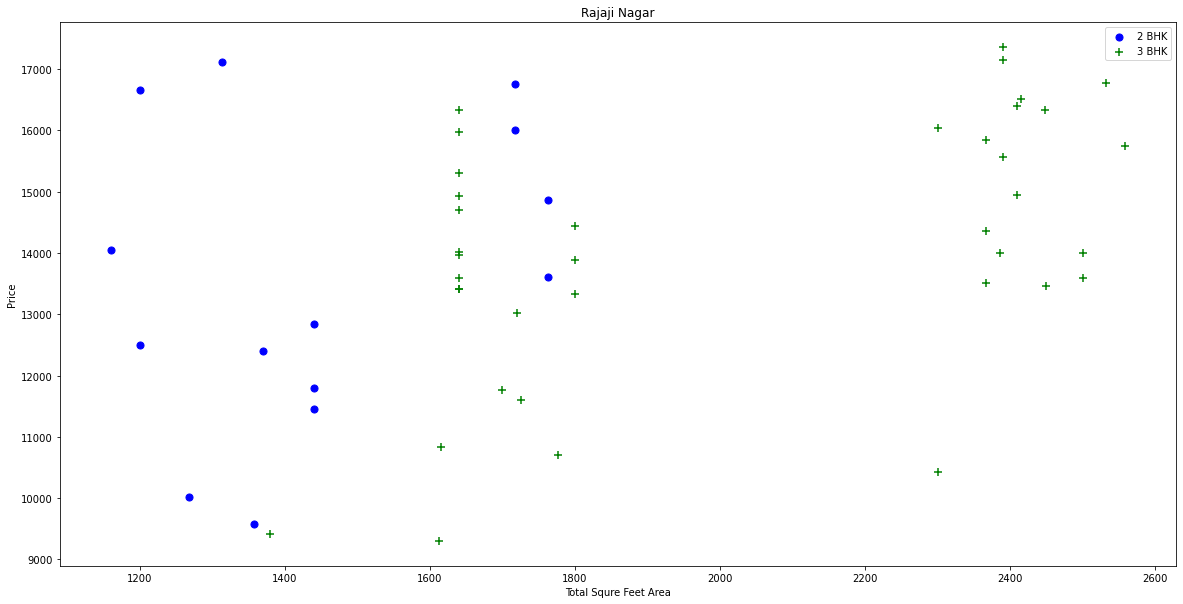

In [26]:
def scatter_chart(df,loc):
    bhk2=df[(df.location==loc)&(df.bhk==2)]
    bhk3=df[(df.location==loc)&(df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,color='green',marker='+',label='3 BHK',s=50)
    plt.xlabel('Total Squre Feet Area')
    plt.ylabel('Price')
    plt.title(loc)
    plt.legend()
scatter_chart(df8,"Rajaji Nagar")

In [27]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df9 = remove_bhk_outliers(df8)
df9.shape

(7329, 6)

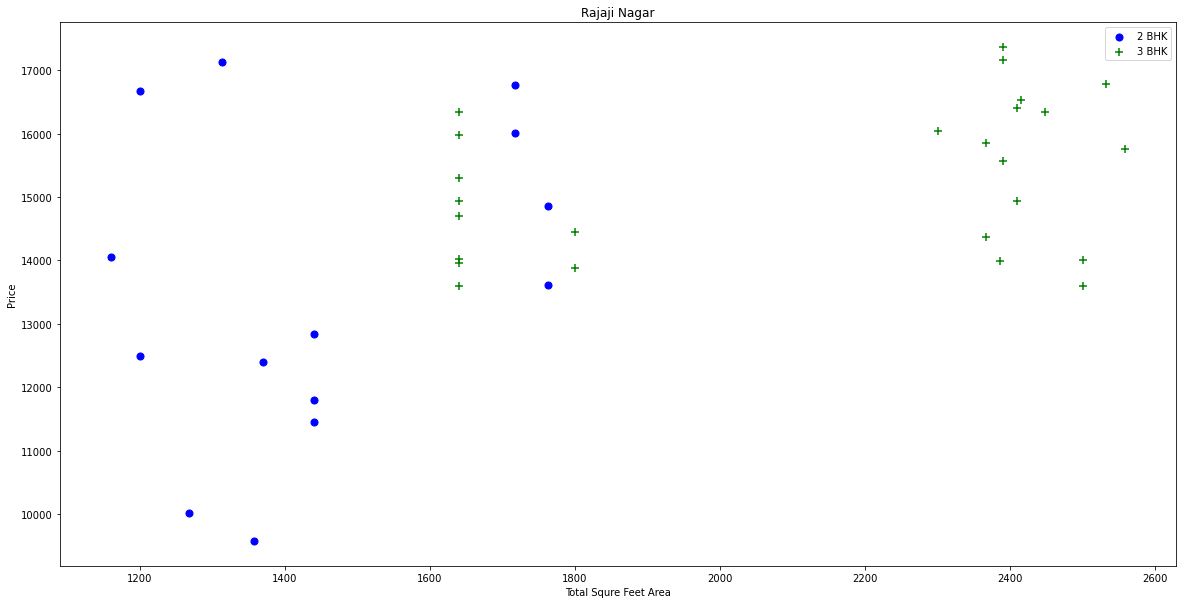

In [28]:
scatter_chart(df9,"Rajaji Nagar")

Text(0, 0.5, 'Count')

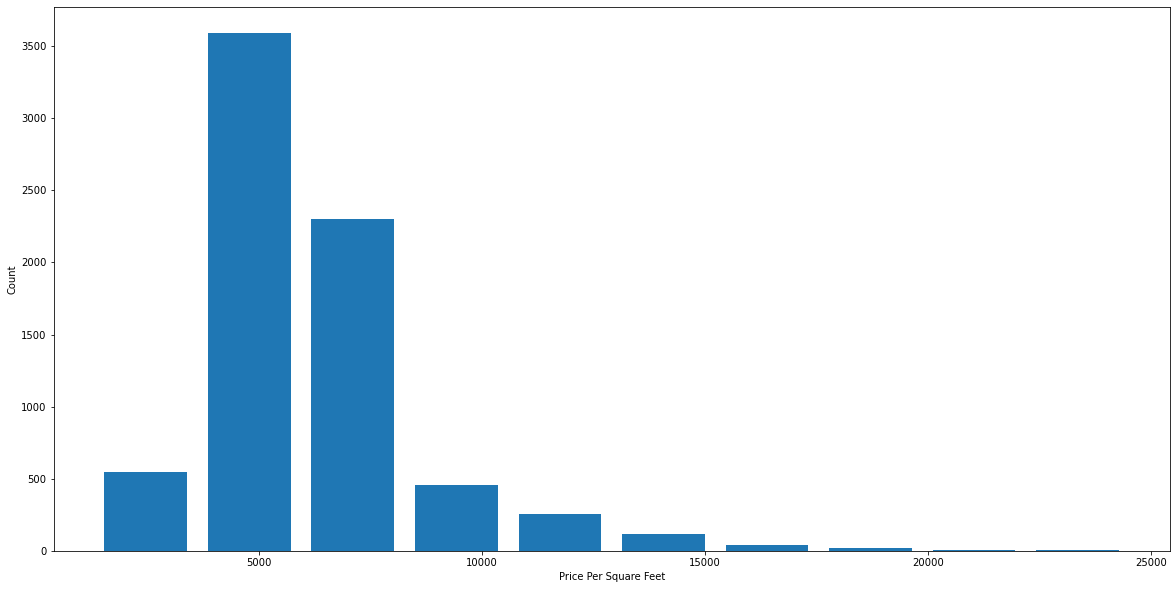

In [29]:
mp.rcParams["figure.figsize"] = (20,10)
plt.hist(df9.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [30]:
df9.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

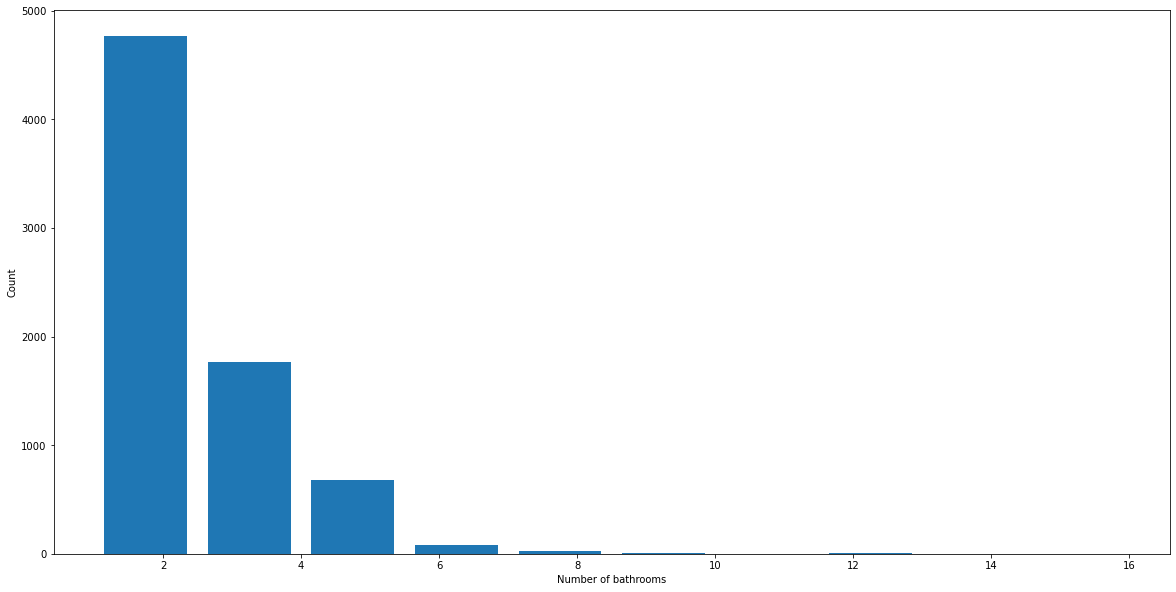

In [31]:
plt.hist(df9.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [32]:
df9[df9.bath>10]

,location,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8486,other,12000.0,12.0,525.0,10,4375.000000
8575,other,10000.0,16.0,550.0,16,5500.000000
9308,other,6000.0,12.0,150.0,11,2500.000000
9639,other,5425.0,13.0,275.0,13,5069.124424


In [33]:
df9[df9.bath>df9.bhk+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8411,other,11338.0,9.0,1000.0,6,8819.897689


In [34]:
df10 = df9[df9.bath<df9.bhk+2]
df10.shape

(7251, 6)

In [35]:
df10.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668


In [36]:
df11 = df10.drop(['price_per_sqft'],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [37]:
dummies = pd.get_dummies(df11.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df12 = pd.concat([df11,dummies.drop('other',axis='columns')],axis='columns')
df12.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df13 = df12.drop('location',axis='columns')
df13.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df13.shape

(7251, 245)

In [41]:
X = df13.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
y = df13.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [44]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8452277697873745

In [45]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [46]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': False}
1,lasso,0.687478,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.728101,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [47]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]
predict_price('1st Block Jayanagar',2850, 4, 4)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


355.52271518858356

In [48]:
predict_price('1st Block Jayanagar',1630, 3.0, 3.0)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


255.32981182052492

In [49]:
df11.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [50]:
import pickle
with open('house_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [51]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))